In [22]:
import sys
sys.path.append("/home/files/uos_plantclassification")
import pandas as pd
import json
from mod.read_metric import make_df


flat = "/home/files/experiments/efficientB4/exp_set1/logs/categorical_metrics_test.csv"
df_flat = pd.read_csv(flat)
with open("/home/files/uos_plantclassification/data/plantnet/name_to_train_samples.json", 'r') as file:
    name_to_train_samples = json.load(file)
train_samples = []  
for name in df_flat.name:
    train_samples.append(name_to_train_samples[name])
df_flat['train_samples'] = train_samples

hier = "/home/files/experiments/plantnet/genera_species_hierarchical_classifier/finetune/logs/categorical_metrics_test.csv"
df_hier = pd.read_csv(hier)
with open("/home/files/uos_plantclassification/data/plantnet/name_to_train_samples.json", 'r') as file:
    name_to_train_samples = json.load(file)
train_samples = []  
for name in df_hier.name:
    train_samples.append(name_to_train_samples[name])
df_hier['train_samples'] = train_samples

In [25]:
print("~100", len(df_flat[df_flat.train_samples<=100]), df_flat[df_flat.train_samples<=100].recall.mean())
print("100~200", len(df_flat[(df_flat.train_samples>100)*(df_flat.train_samples<=200)]), df_flat[(df_flat.train_samples>100)*(df_flat.train_samples<=200)].recall.mean())
print("200~500", len(df_flat[(df_flat.train_samples>200)*(df_flat.train_samples<=500)]), df_flat[(df_flat.train_samples>200)*(df_flat.train_samples<=500)].recall.mean())
print("500~1000", len(df_flat[(df_flat.train_samples>500)*(df_flat.train_samples<=1000)]), df_flat[(df_flat.train_samples>500)*(df_flat.train_samples<=1000)].recall.mean())
print("1000~2000", len(df_flat[(df_flat.train_samples>1000)*(df_flat.train_samples<=2000)]), df_flat[(df_flat.train_samples>1000)*(df_flat.train_samples<=2000)].recall.mean())
print("2000~5000", len(df_flat[(df_flat.train_samples>2000)*(df_flat.train_samples<=5000)]), df_flat[(df_flat.train_samples>2000)*(df_flat.train_samples<=5000)].recall.mean())
print("5000~10000", len(df_flat[(df_flat.train_samples>5000)*(df_flat.train_samples<=10000)]), df_flat[(df_flat.train_samples>5000)*(df_flat.train_samples<=10000)].recall.mean())

~100 789 0.20224365970849176
100~200 100 0.52057584688
200~500 84 0.6237487483333334
500~1000 43 0.6751628574651163
1000~2000 35 0.8157397828571429
2000~5000 24 0.8863140824999999
5000~10000 6 0.9383818599999999


In [26]:
print("~100", len(df_hier[df_hier.train_samples<=100]), df_hier[df_hier.train_samples<=100].recall.mean())
print("100~200", len(df_hier[(df_hier.train_samples>100)*(df_hier.train_samples<=200)]), df_hier[(df_hier.train_samples>100)*(df_hier.train_samples<=200)].recall.mean())
print("200~500", len(df_hier[(df_hier.train_samples>200)*(df_hier.train_samples<=500)]), df_hier[(df_hier.train_samples>200)*(df_hier.train_samples<=500)].recall.mean())
print("500~1000", len(df_hier[(df_hier.train_samples>500)*(df_hier.train_samples<=1000)]), df_hier[(df_hier.train_samples>500)*(df_hier.train_samples<=1000)].recall.mean())
print("1000~2000", len(df_hier[(df_hier.train_samples>1000)*(df_hier.train_samples<=2000)]), df_hier[(df_hier.train_samples>1000)*(df_hier.train_samples<=2000)].recall.mean())
print("2000~5000", len(df_hier[(df_hier.train_samples>2000)*(df_hier.train_samples<=5000)]), df_hier[(df_hier.train_samples>2000)*(df_hier.train_samples<=5000)].recall.mean())
print("5000~10000", len(df_hier[(df_hier.train_samples>5000)*(df_hier.train_samples<=10000)]), df_hier[(df_hier.train_samples>5000)*(df_hier.train_samples<=10000)].recall.mean())

~100 789 0.23808847975918887
100~200 100 0.6110855051
200~500 84 0.6770564726904763
500~1000 43 0.7300111244186046
1000~2000 35 0.8417837711428572
2000~5000 24 0.9030097633333334
5000~10000 6 0.9375730833333332


In [2]:
df = make_df(baseline_efficientB4, dhc_finetune_efficientB4, "/home/files/uos_plantclassification/data/mini_plantnet/genera_to_species.json",
             "/home/files/uos_plantclassification/data/mini_plantnet/species_to_num_train_samples.json")

/home/files/uos_plantclassification/jupyters/mod/read_metric.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['recall_gap'] = df2['recall'] - df1['recall']


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter(df):
    x = df['proportion']
    y = df['recall_gap']

    plt.title("recall gain(%) per proportion")
    plt.ylabel("recall gain each species")
    plt.xlabel("each species's proportion in the genera")
    plt.plot(x,y,'o')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b)
    plt.ylim(-1.0, +1.0)
    plt.show()

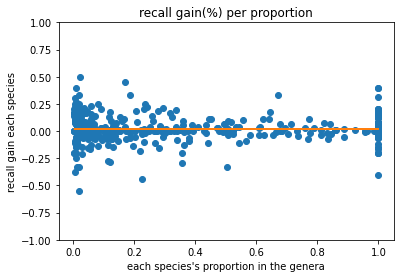

In [25]:
plot_scatter(df)

In [26]:
df.describe()

,train_samples,test_samples,family_size,proportion,cluster_id,recall,recall_gap
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,509.391863,64.282655,8.850107,0.344754,54.539615,0.601190,0.019184
std,960.095260,119.987005,9.266848,0.382205,44.815071,0.307989,0.115290
min,32.000000,4.000000,1.000000,0.002420,1.000000,0.000000,-0.555556
25%,68.000000,9.000000,2.000000,0.027067,13.000000,0.375000,-0.011997
50%,139.000000,18.000000,4.000000,0.146245,45.000000,0.677419,0.000000
75%,429.000000,54.500000,13.000000,0.668004,84.000000,0.864061,0.066667
max,7208.000000,902.000000,34.000000,1.000000,161.000000,1.000000,0.500000


In [37]:
df[df['cluster_id']==8].sort_values("train_samples", ascending=False)

,name,train_samples,test_samples,family_size,proportion,cluster_id,recall,recall_gap
55,Lamium purpureum L.,4502,563,9,0.364416,8,0.918295,-0.012433
103,Lamium galeobdolon (L.) L.,2738,343,9,0.221629,8,0.962099,0.008746
236,Lamium maculatum (L.) L.,1685,211,9,0.136393,8,0.748815,0.033175
235,Lamium album L.,1671,208,9,0.135260,8,0.956731,-0.043269
11,Lamium amplexicaule L.,823,104,9,0.066618,8,0.663462,0.038462
54,Lamium hybridum Vill.,661,83,9,0.053505,8,0.024096,0.084337
392,Lamium maculatum L.,126,16,9,0.010199,8,0.250000,-0.062500
335,Lamium orvala L.,83,11,9,0.006718,8,0.818182,0.090909
53,Lamium flexuosum Ten.,65,9,9,0.005261,8,0.000000,0.000000


In [5]:
df[df.proportion>0.9].describe()

,train_samples,test_samples,family_size,proportion,cluster_id,recall,recall_gap
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,682.173913,85.880435,1.108696,0.996753,95.565217,0.733073,0.024209
std,1345.182741,168.140433,0.404820,0.012267,43.762171,0.248278,0.110189
min,32.000000,4.000000,1.000000,0.924165,15.000000,0.000000,-0.400000
25%,53.750000,7.750000,1.000000,1.000000,64.000000,0.600000,0.000000
50%,127.000000,16.500000,1.000000,1.000000,100.500000,0.803846,0.000000
75%,412.500000,52.250000,1.000000,1.000000,132.500000,0.922932,0.045455
max,7208.000000,902.000000,3.000000,1.000000,161.000000,1.000000,0.400000


In [ ]:
df1 = df[(df.proportion>0.9)*(df.train_samples<53)]
plot_scatter(df1)

In [ ]:
df2 = df[(df.proportion>0.9)*(df.train_samples>412)]
plot_scatter(df2)

In [ ]:
df1.describe()

In [ ]:
df2.describe()

In [ ]:
import json
from os.path import join
from os import listdir
import albumentations as A
from albumentations.pytorch import ToTensorV2
from config.path import PATH
from data import get_mini_plantnet, MiniPlantNet
transforms = {
    'train': A.Compose([
        A.Resize(height=380, width=380),
        A.HorizontalFlip(p=0.5),
        A.Normalize(mean=0.0, std=1.0),
        ToTensorV2()]),
    'val': A.Compose([
        A.Resize(height=380, width=380),
        A.Normalize(mean=0.0, std=1.0),
        ToTensorV2()]),
    'test': A.Compose([
        A.Resize(height=380, width=380),
        A.Normalize(mean=0.0, std=1.0),
        ToTensorV2()])
}

dataset = MiniPlantNet(root=PATH["PLANTNET-300K"], split="train", shuffle=False, transform=transforms["test"])

#mini plantnet의 학습데이터 수
label_to_train_samples = {}
name_to_train_samples = {}
for name, label in zip(dataset.name_to_label.keys(), dataset.name_to_label.values()):
    num_samples = len(listdir(join(PATH["PLANTNET-300K"], "images", "train", label)))
    label_to_train_samples[label] = num_samples
    name_to_train_samples[name] = num_samples
train_samples = []
for name in df1.name:
    train_samples.append(name_to_train_samples[name])
df1['train_samples'] = train_samples
df2['train_samples'] = train_samples

# 클러스터 정보
with open(f"{exp_path}/cluster_radius_{radius}/name_clusters.json") as file:
    data = json.load(file)
        
list_of_cluster = list(data.values())
name_to_num_members = {}
name_to_scr = {}
name_to_cluster_id = {}

_id = 0
for cluster in list_of_cluster:
    _id+=1
    num_members = len(cluster)
    samples_of_cluster = 0
    for member in cluster:
        name_to_num_members[member] = num_members
        name_to_cluster_id[member] = _id
        samples_of_cluster += df1[df1.name == member].train_samples.values[0]
    for member in cluster:
        name_to_scr[member] = samples_of_cluster/df1[df1.name == member].train_samples.values[0]
scr = []
num_family_member = []
cluster_id = []
for name in df1.name:
    scr.append(name_to_scr[name])
    num_family_member.append(name_to_num_members[name])
    cluster_id.append(name_to_cluster_id[name])
    
df1['scr'] = scr
df2['scr'] = scr
df1['num_family_member'] = num_family_member
df2['num_family_member'] = num_family_member
df1['cluster_id'] = cluster_id
df2['cluster_id'] = cluster_id

In [ ]:
df3 = df2[['name', 'train_samples', 'num_family_member', 'scr', 'cluster_id']]
df3['recall_gap'] = df2['recall'] - df1['recall']

In [ ]:
df = df3.sort_values("recall_gap", ascending=False)

In [ ]:
df

In [ ]:
df[df.cluster_id==69]

In [ ]:
df[df.cluster_id==154]

In [ ]:
df[df.cluster_id==40]

In [ ]:
df[df.cluster_id==171]

In [ ]:
df[df.cluster_id==263]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df3['scr']
y = df3['recall_gap']

plt.title("acc-gain(%) per scr")
plt.plot(x,y*100,'o')
m, b = np.polyfit(x, y*100, 1)
plt.plot(x, m*x+b)

In [ ]:
df3[df3['num_family_member']==1].recall_gap

In [ ]:
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==1)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==2)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==3)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==4)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']>4)].recall.mean())

In [ ]:
df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==3)]

In [ ]:
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<500)*(df1['num_family_member']==1)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<500)*(df1['num_family_member']==2)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<500)*(df1['num_family_member']==3)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<500)*(df1['num_family_member']==4)].recall.mean())
print(df1[(df1['train_samples']>=32)*(df1['train_samples']<500)*(df1['num_family_member']>4)].recall.mean())

In [ ]:
df1[(df1['train_samples']>=32)*(df1['train_samples']<100)*(df1['num_family_member']==1)]

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']==1)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=200)*(df3['train_samples']<500)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=500)*(df3['train_samples']<1000)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=1000)*(df3['train_samples']<2000)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=2000)*(df3['train_samples']<5000)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=5000)*(df3['train_samples']<100000)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']==1)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']==2)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']==3)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']==4)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=32)*(df3['train_samples']<100)*(df3['num_family_member']>5)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)*(df3['num_family_member']==1)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)*(df3['num_family_member']==2)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)*(df3['num_family_member']==3)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)*(df3['num_family_member']==4)].recall_gap.mean()

In [ ]:
df3[(df3['train_samples']>=100)*(df3['train_samples']<200)*(df3['num_family_member']>5)].recall_gap.mean()

In [ ]:
for i in df2.num_family_member.unique():
    print(i)
    print(df2[(df2['train_samples']>0)*(df2['num_family_member']==i)]['recall'].mean() - df1[(df1['train_samples']<300)*(df1['num_family_member']==i)]['recall'].mean())

In [ ]:
def compare(x,y):
    print(x['recall'].mean() - y['recall'].mean())

In [ ]:
x = df2[(df2['train_samples']>0)*(df2['train_samples']<=100)]
y = df1[(df2['train_samples']>0)*(df2['train_samples']<=100)]
compare(x,y)
x = df2[(df2['train_samples']>100)*(df2['train_samples']<=300)]
y = df1[(df2['train_samples']>100)*(df2['train_samples']<=300)]
compare(x,y)
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)]
compare(x,y)
x = df2[(df2['train_samples']>500)*(df2['train_samples']<=1000)]
y = df1[(df2['train_samples']>500)*(df2['train_samples']<=1000)]
compare(x,y)
x = df2[(df2['train_samples']>1000)*(df2['train_samples']<=2000)]
y = df1[(df2['train_samples']>1000)*(df2['train_samples']<=2000)]
compare(x,y)

x = df2[(df2['train_samples']>2000)*(df2['train_samples']<=10000)]
y = df1[(df2['train_samples']>2000)*(df2['train_samples']<=10000)]
compare(x,y)

In [ ]:
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==1)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==1)]
compare(x,y)
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==2)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==2)]
compare(x,y)
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==3)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==3)]
compare(x,y)
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==4)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==4)]
compare(x,y)
x = df2[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==5)]
y = df1[(df2['train_samples']>300)*(df2['train_samples']<=500)*(df2['num_family_member']==5)]
compare(x,y)

In [ ]:
df3 = df2[['name', 'train_samples', 'num_family_member']]
df3['recall_gap'] = df2['recall'] - df1['recall']

In [ ]:
df3[(df3['train_samples']>300)*(df3['train_samples']<=500)]

In [ ]:
df3[(df3['train_samples']<500)][:50]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df3, x='train_samples', y='num_family_member', z='recall_gap')
fig.update_traces(marker_size = 1)


In [ ]:
from matplotlib import pyplot as plt



X = df3['train_samples']
Y = df3['num_family_member']
Z = df3['recall_gap']

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X,Y,Z)


In [ ]:
#df3[df3['train_samples']<100].recall_gap.mean()
df3[df3['train_samples']>100].recall_gap.mean()

In [ ]:
df3[df3['train_samples']<100].recall_gap.mean()

In [ ]:
df2[(df2['train_samples']<300)*(df2['num_family_member']==3)]['recall'].mean() - df1[(df1['train_samples']<300)*(df1['num_family_member']==3)]['recall'].mean()

In [ ]:
df2[(df2['train_samples']<300)*(df2['num_family_member']==5)]['recall'].mean() - df1[(df1['train_samples']<300)*(df1['num_family_member']==5)]['recall'].mean()

In [ ]:
df2[(df2['train_samples']<300)*(df2['num_family_member']==6)]['recall'].mean() - df1[(df1['train_samples']<300)*(df1['num_family_member']==6)]['recall'].mean()

In [ ]:
df2[(df2['train_samples']<300)*(df2['num_family_member']==6)]['recall'].mean() - df1[(df1['train_samples']<300)*(df1['num_family_member']==6)]['recall'].mean()

In [ ]:
(df2.recall-df1.recall).mean()

In [ ]:
df2.recall.mean() - df1.recall.mean()

In [ ]:
df2['recall'].mean()

In [ ]:
print(df1[df1.samples_per_class<100]['recall'].mean())
print(df2[df2.samples_per_class<100]['recall'].mean())

In [ ]:
print(df1[(500<df1.samples_per_class)*(df1.samples_per_class<2000)]['recall'].mean())
print(df2[(500<df1.samples_per_class)*(df1.samples_per_class<2000)]['recall'].mean())

In [ ]:
for x in range(10):
    if 3<x<8:
        print(x)